**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime as dt
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

**Reading Data**

In [2]:
lead_score = pd.read_csv("Leads.csv")
lead_score_copy = pd.read_csv("Leads.csv")
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


**Data Cleaning**

In [5]:
# % of missing values column wise
round(100*(lead_score.isnull().sum()/len(lead_score)),2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [6]:
# Replacing 'Select' value as 'nan'

lead_score = lead_score.replace('Select',np.nan)

In [7]:
# % of missing values column wise after 'select' handling
round(100*(lead_score.isnull().sum()/len(lead_score)),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [8]:
# Checking columns with only one unique value
lead_score.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [9]:
# Removing columns with only one unique value as they are not useful for analysis

lead_score = lead_score.loc[:,lead_score.nunique()!=1]
lead_score.shape

(9240, 32)

In [10]:
# Removing all the columns that have 35% or more null values and the coloums that are not needed
lead_score = lead_score.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
lead_score.shape

(9240, 22)

In [11]:
# % of missing values column wise
round(100*(lead_score.isnull().sum()/len(lead_score)),2).sort_values(ascending=False)

Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Newspaper Article                                 0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Prospect ID                                       0.00
Search                                            0.00
Lead Origin                                       0.00
Total Time Spent on Website                       0.00
Converted 

In [12]:
#Replacing the top 4 columns that has the highest percentage of null values with 'not provided'.

lead_score['Specialization'] = lead_score['Specialization'].fillna('not provided')
lead_score['What matters most to you in choosing a course'] = lead_score['What matters most to you in choosing a course'].fillna('not provided')
lead_score['Country'] = lead_score['Country'].fillna('not provided')
lead_score['What is your current occupation'] = lead_score['What is your current occupation'].fillna('not provided')

In [13]:
# % to lose if missing values are removed
round(100*(sum(lead_score.isnull().sum(axis=1)>1)/lead_score.shape[0]),2)

1.48

In [14]:
lead_score = lead_score[lead_score.isnull().sum(axis=1)<1]

In [15]:
# % of missing values column wise
round(100*(lead_score.isnull().sum()/len(lead_score)),2).sort_values(ascending=False)

Prospect ID                                      0.0
Lead Origin                                      0.0
A free copy of Mastering The Interview           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                   0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                             0.0
Total Time Spent on Website                      0.0
TotalVisits                                      0.0
Converted                                        0.0
Do Not Call                                   

In [16]:
lead_score.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [17]:
#Removing ID column as it is unique for all
lead_score = lead_score.drop('Prospect ID',axis=1)

In [18]:
lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,not provided,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


**Outliers Handling**

In [19]:
numeric = lead_score[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
max,251.000000,2272.000000,55.000000


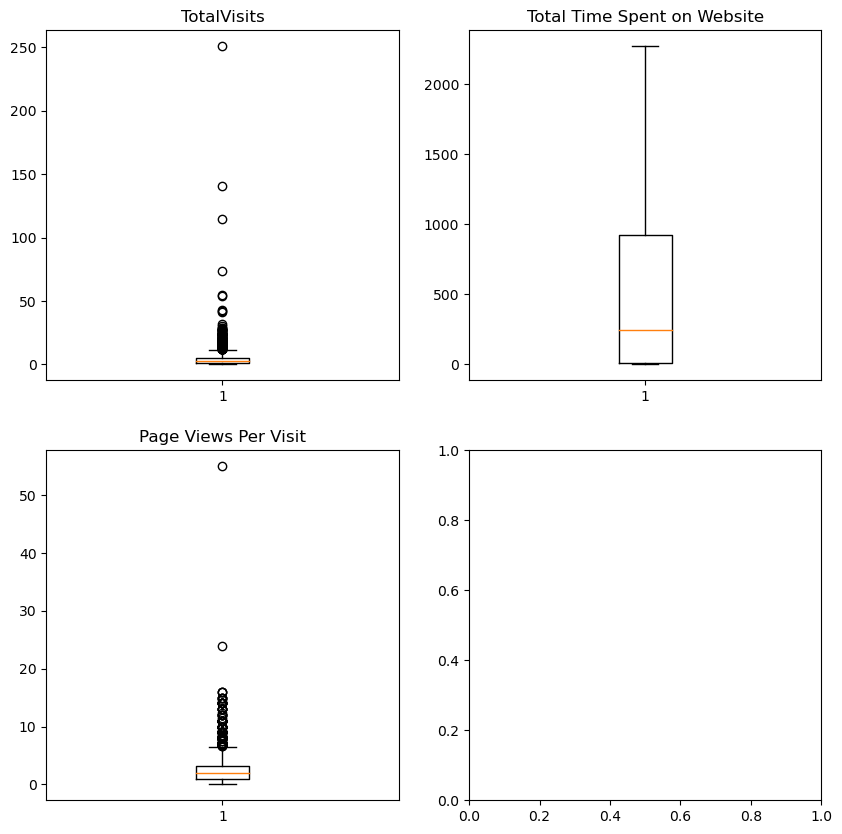

In [20]:
fig, axis = plt.subplots(2, 2,figsize=(10,10))


axis[0, 0].boxplot(lead_score.TotalVisits)
axis[0, 0].set_title('TotalVisits')
axis[0, 1].boxplot(lead_score["Total Time Spent on Website"])
axis[0, 1].set_title('Total Time Spent on Website')
axis[1, 0].boxplot(lead_score["Page Views Per Visit"])
axis[1, 0].set_title('Page Views Per Visit');

In [21]:
columns=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for column in columns:
    Q1=lead_score[column].quantile(0.01)
    Q3=lead_score[column].quantile(0.99)
    IQR=Q3-Q1
    leads_final=lead_score[(lead_score[column]>=Q1) & (lead_score[column]<=Q3)]

In [22]:
numeric = lead_score[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
max,251.000000,2272.000000,55.000000


**Creating Dummy Variables**

In [23]:
lead_score.loc[:,lead_score.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [24]:
#Create dummy variables using 'get_dummies'

dummy = pd.get_dummies(lead_score[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
lead_score_dum = pd.concat([lead_score, dummy], axis=1)
lead_score_dum.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,0,0,1,0,0,0,0,0,0,0


In [25]:
lead_score_dum = lead_score_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
lead_score_dum.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


**Splitting The Data**

In [26]:
X = lead_score_dum.drop(['Converted'],1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [27]:
y = lead_score_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [28]:
#Splitting the dataset into test and train
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=10)

**Exploratory Data Analysis**

In [29]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

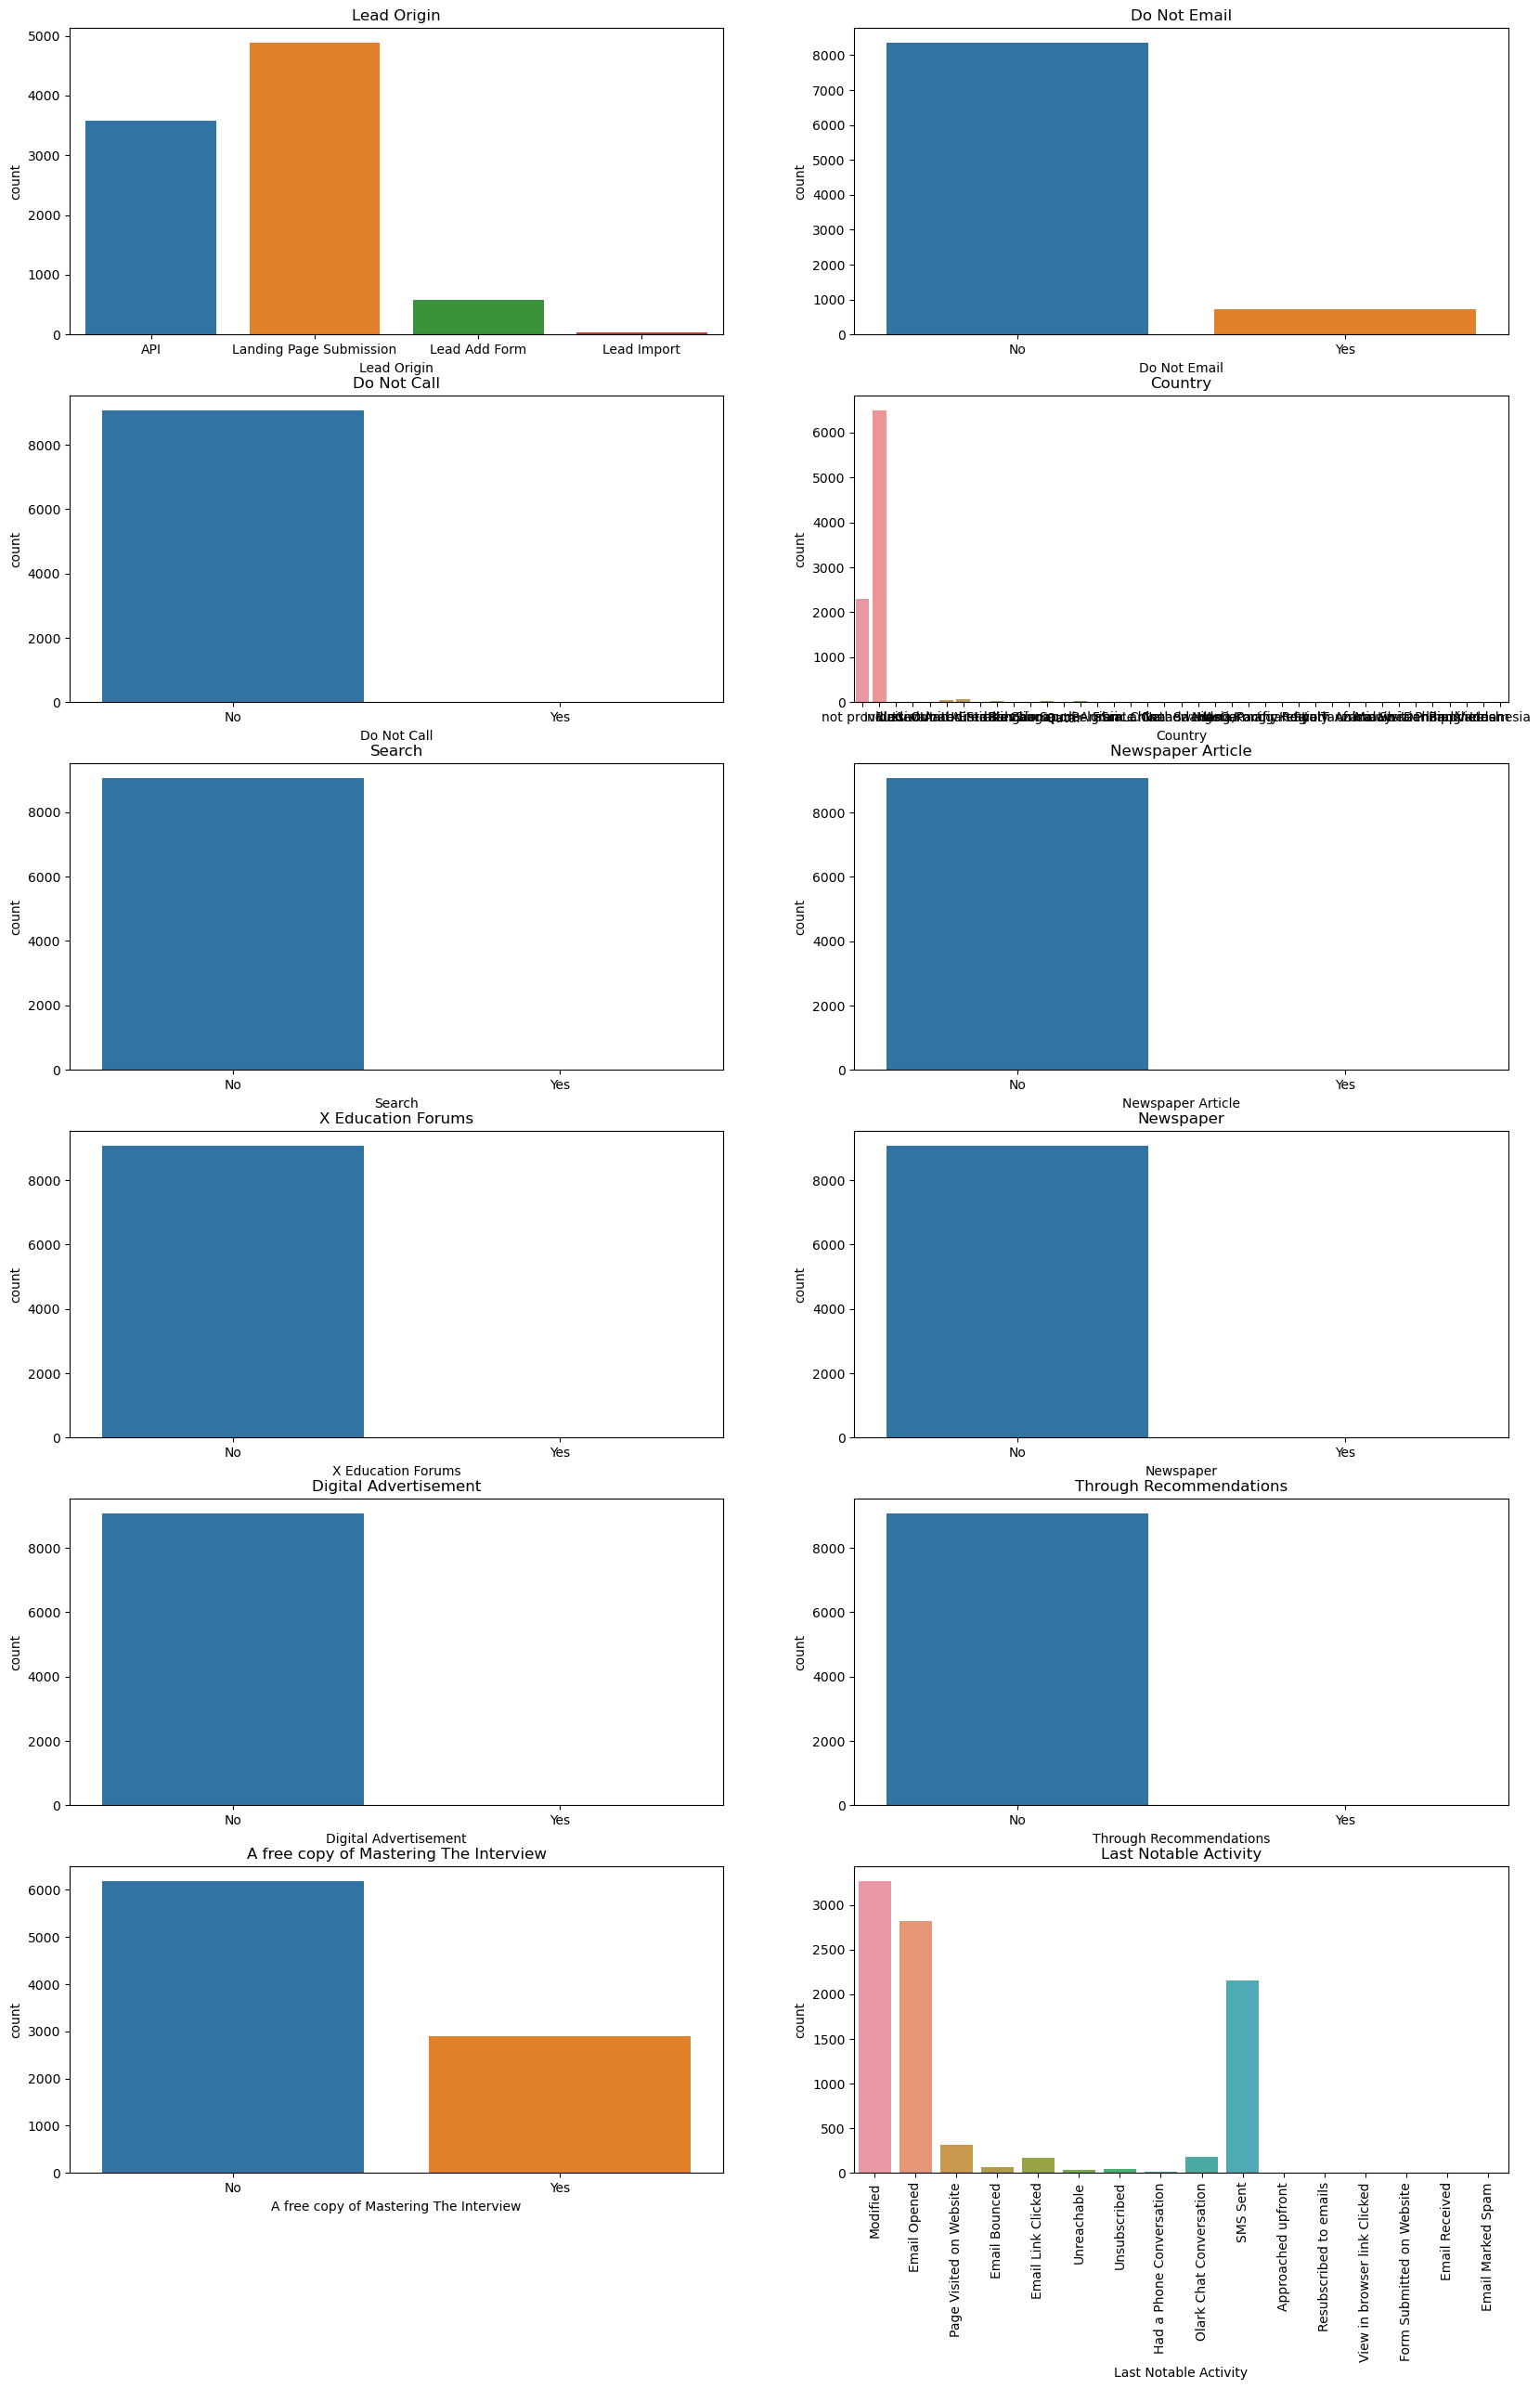

In [30]:
plt.figure(figsize = (20,30))

plt.subplot(6,2,1)
sns.countplot(x='Lead Origin',data = lead_score)
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(x='Do Not Email',data = lead_score)
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(x='Do Not Call',data = lead_score)
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(x='Country',data = lead_score)
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(x='Search',data = lead_score)
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(x='Newspaper Article',data = lead_score)
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(x='X Education Forums',data = lead_score)
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(x='Newspaper',data = lead_score)
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(x='Digital Advertisement',data = lead_score)
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(x='Through Recommendations',data = lead_score)
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(x='A free copy of Mastering The Interview',data = lead_score)
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(x='Last Notable Activity',data = lead_score)
plt.tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

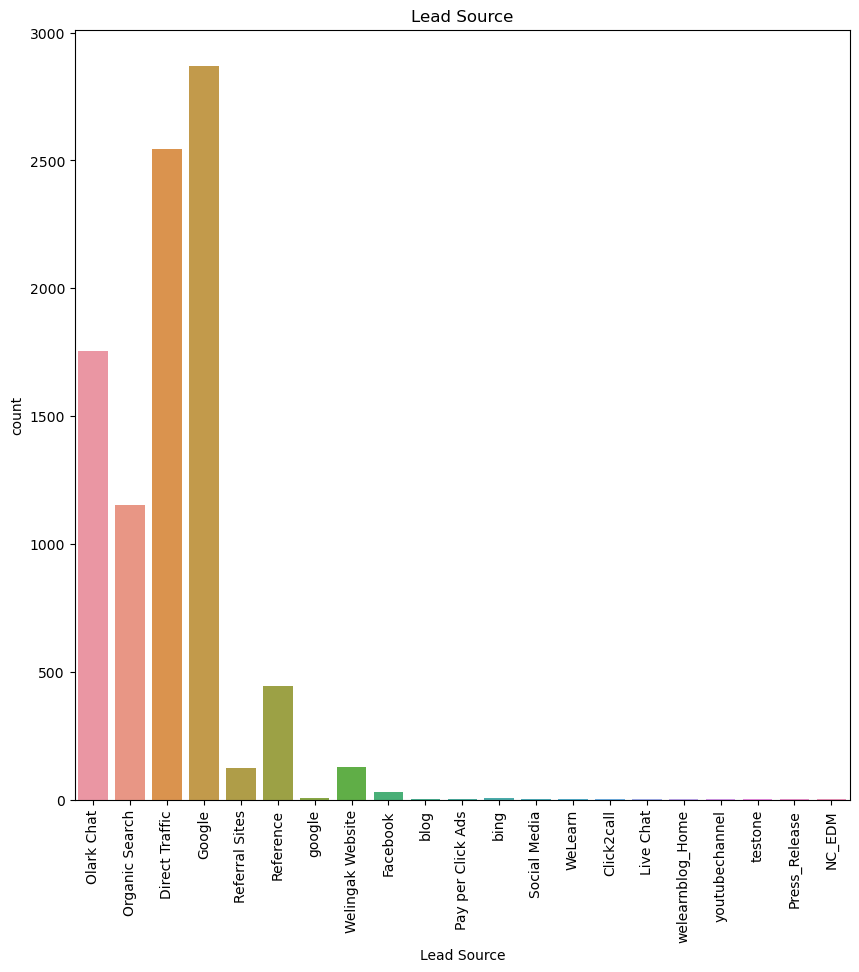

In [31]:
plt.figure(figsize = (10,10))
sns.countplot(x='Lead Source',data=lead_score)
plt.tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

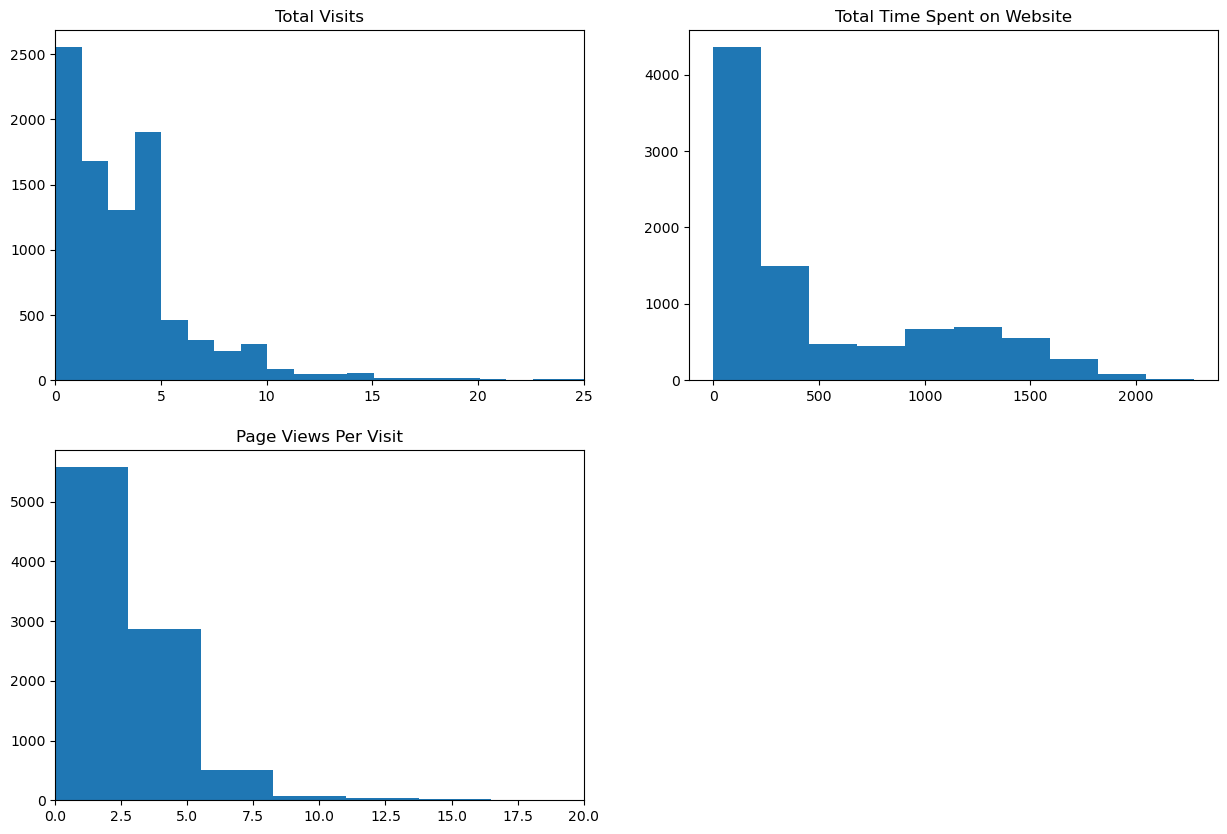

In [32]:
plt.figure(figsize = (15,10))
plt.subplot(221)
plt.hist(lead_score['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(lead_score['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(lead_score['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

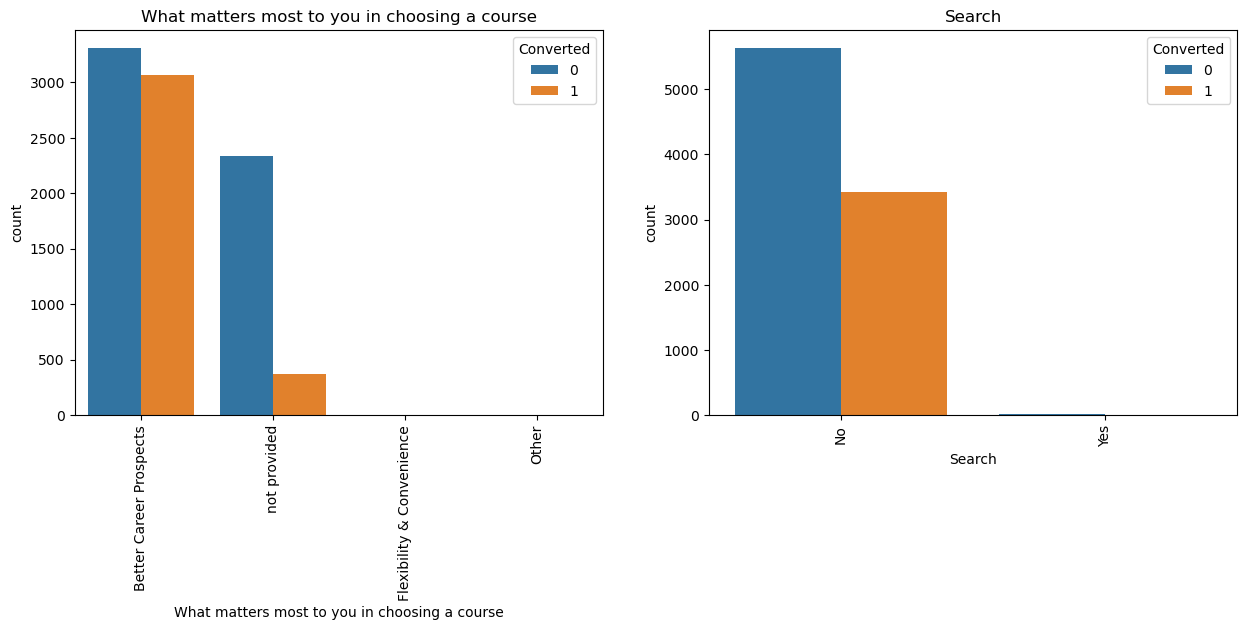

In [33]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= lead_score).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= lead_score).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

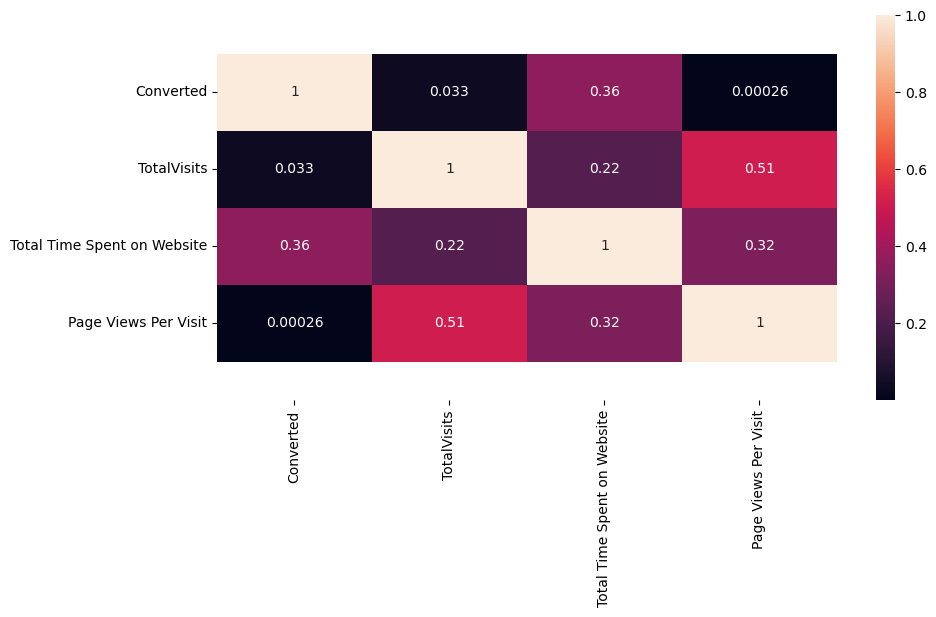

In [34]:
#To check the correlation amaong variables
plt.figure(figsize=(10,5))
ax = sns.heatmap(lead_score.corr(),annot=True)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

**Feature Scaling**

In [35]:
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Checking For Correlations

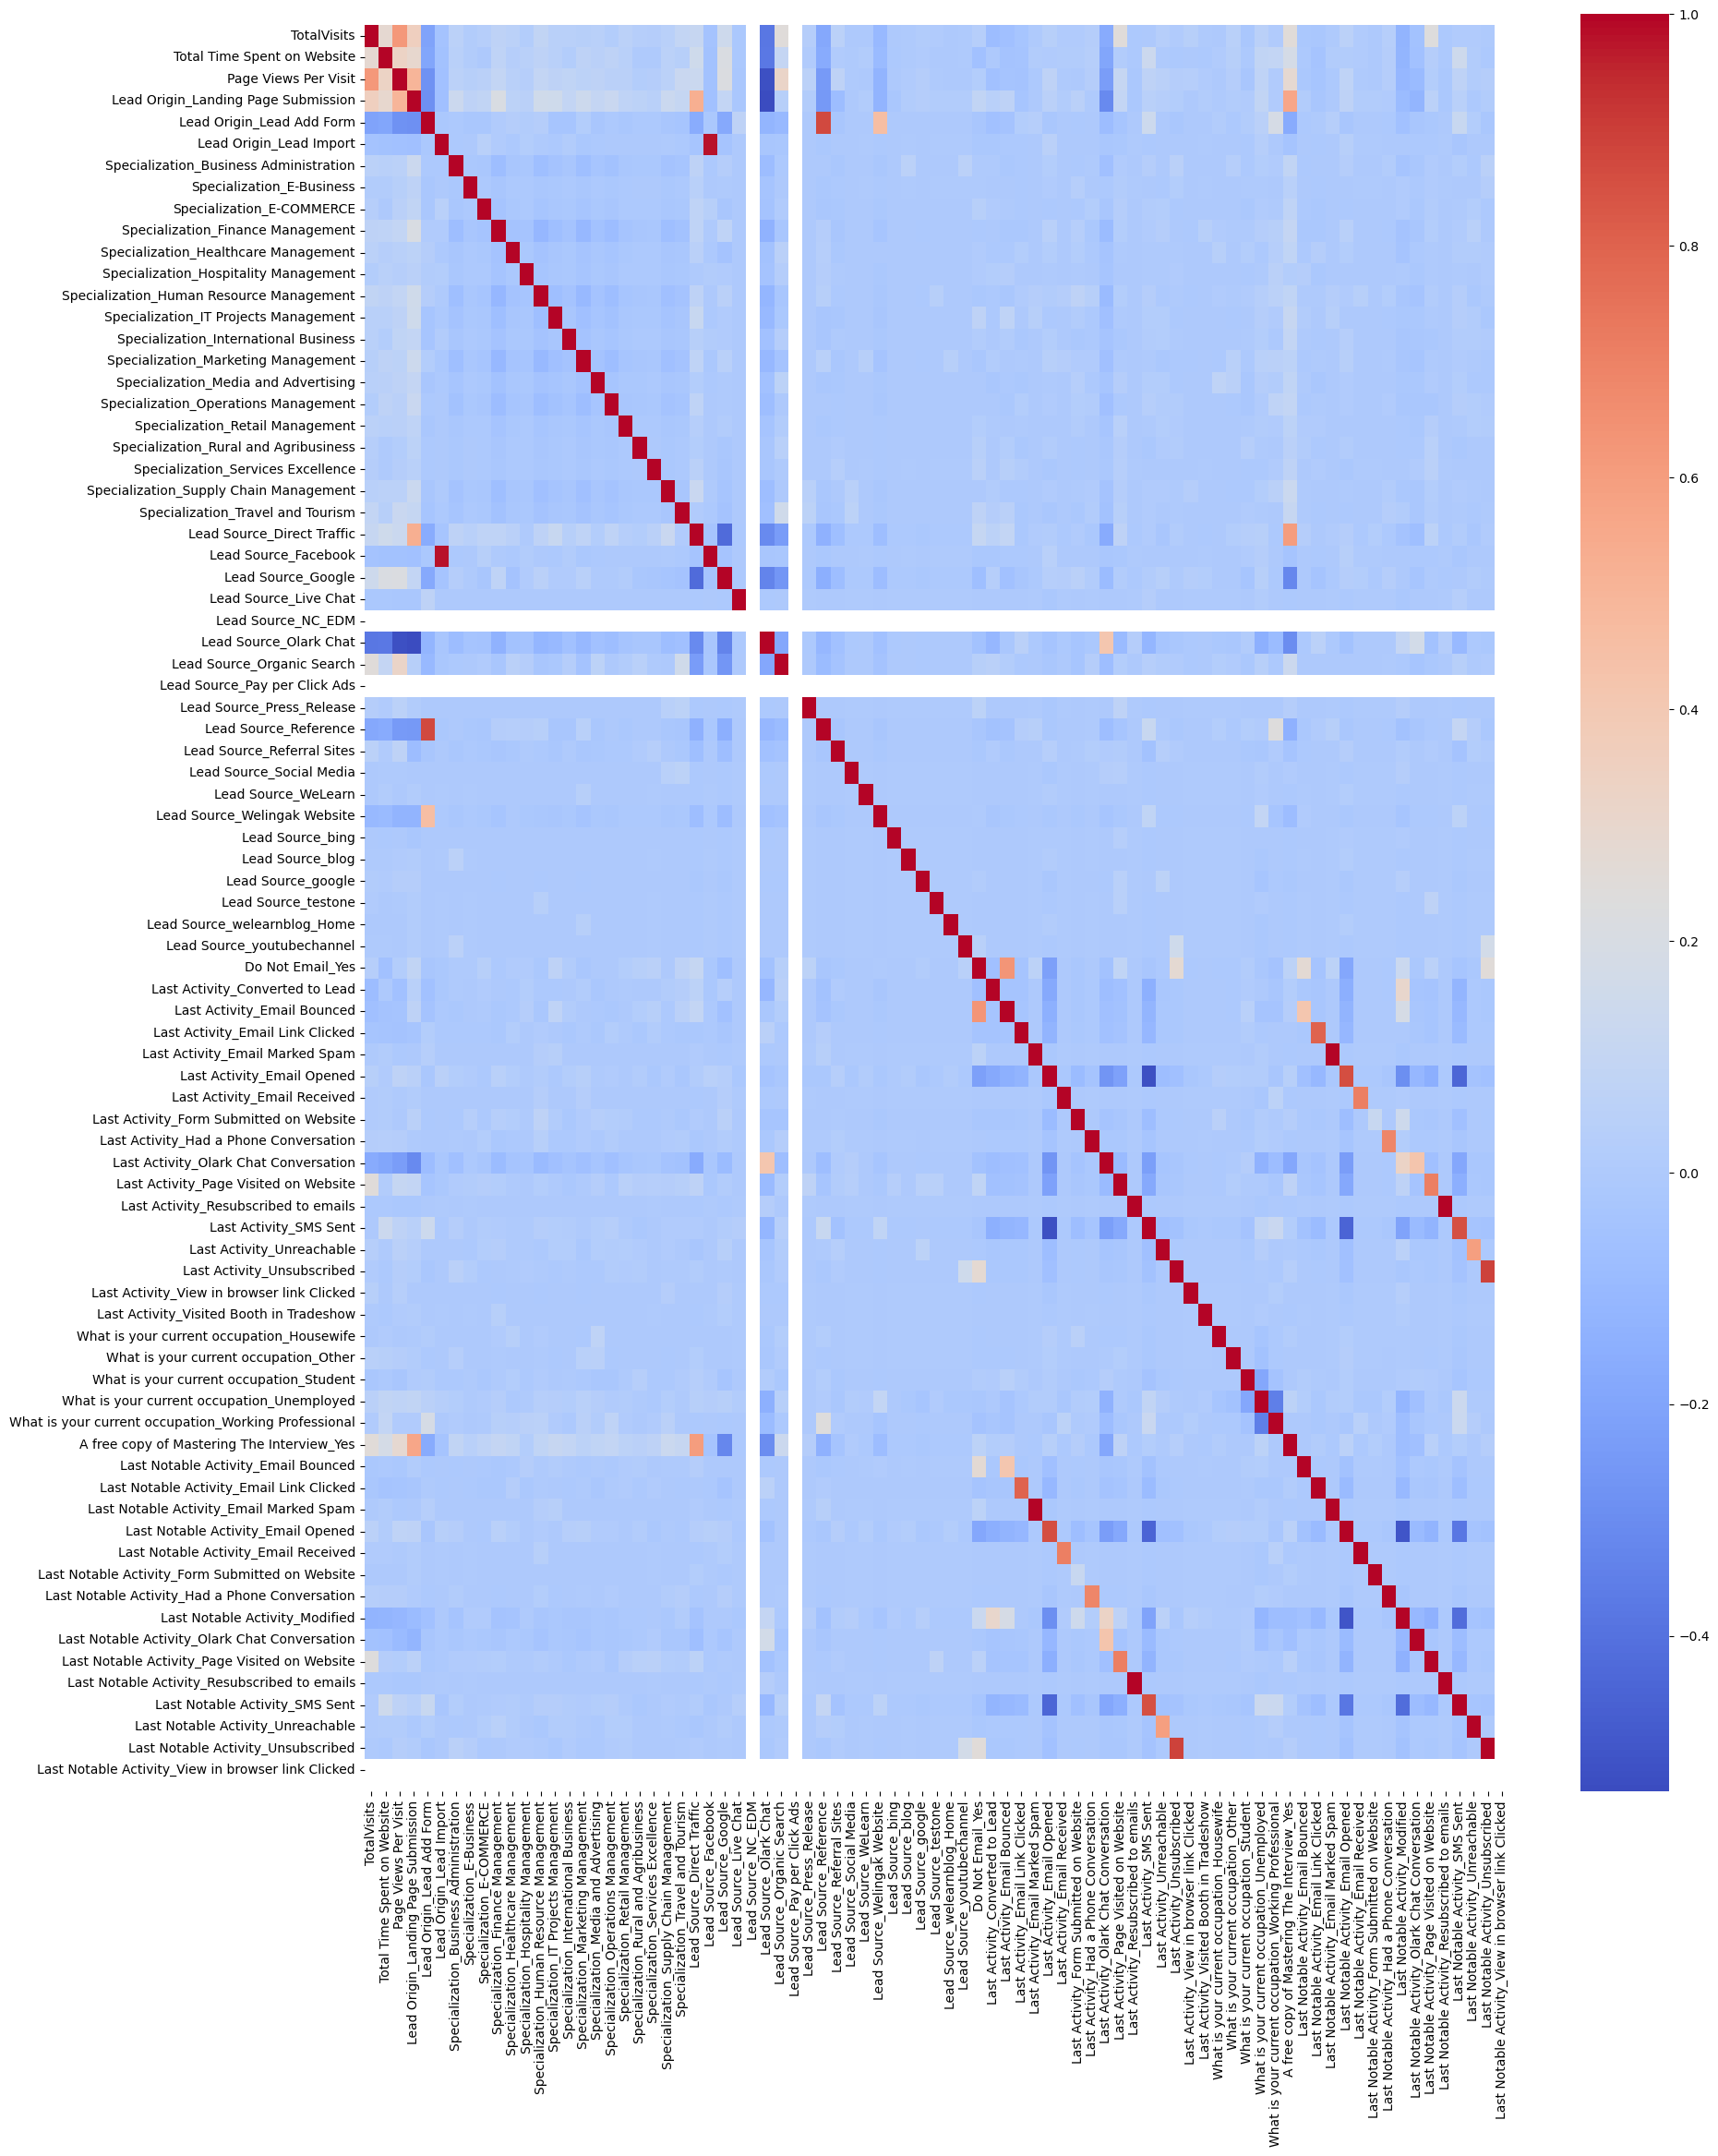

In [36]:
plt.figure(figsize=(20,25))
ax = sns.heatmap(X_train.corr(),cmap="coolwarm")
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

Since there are too many variables, we will use RFE to select variables.

**Model Building**

In [37]:
rfe = RFE(estimator = log_reg,n_features_to_select= 30)
rfe = rfe.fit(X_train,y_train)

In [38]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 27),
 ('Specialization_Business Administration', False, 18),
 ('Specialization_E-Business', False, 17),
 ('Specialization_E-COMMERCE', False, 8),
 ('Specialization_Finance Management', False, 15),
 ('Specialization_Healthcare Management', False, 10),
 ('Specialization_Hospitality Management', False, 30),
 ('Specialization_Human Resource Management', False, 16),
 ('Specialization_IT Projects Management', False, 13),
 ('Specialization_International Business', False, 23),
 ('Specialization_Marketing Management', False, 7),
 ('Specialization_Media and Advertising', False, 29),
 ('Specialization_Operations Management', False, 12),
 ('Specialization_Retail Management', False, 49),
 ('Specialization_Rural and Agribusiness', False, 9),
 ('Specialization_Services

In [40]:
cols = X_train.columns[rfe.support_]
cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversat

In [41]:
X_train_rfe = X_train[cols]

In [42]:
X_train_rfe.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_Unreachable
1289,0.014184,0.612676,0.083333,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5584,0.042553,0.751761,0.250000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [43]:
X_train_sm = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2559.8
Date:                Sun, 16 Jul 2023   Deviance:                       5119.7
Time:                        23:16:04   Pearson chi2:                 6.47e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4104
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0052      0.218     -9.178      0.000      -2.433      -1.577
TotalVisits                                              8.4291      1.962      4.296      0.000       4.583      12.275
Total Time Spent on Website                              4.6432      0.170     27.292      0.000       4.310       4.977
Page Views Per Visit                                    -2.5499      0.604     -4.218      0.000      -3.735      -1.365
Lead Origin_Lead Add Form                                1.3629      1.169      1.166      0.244      -0.928       3.654
Lead Source_Direct Traffic                              -0.3551      0.084     -4.227      0.000      -0.520      -0.190
Lead Source_Olark Chat                                   1.1592      0.129      8.994      0.000       0.907       1.412
Lead Source_Reference                                    2.0180      1.189      1.698      0.090      -0.312       4.348
Lead Source_Welingak Website                             4.6078      1.546      2.980      0.003       1.578       7.638
Do Not Email_Yes                                        -1.2696      0.206     -6.150      0.000      -1.674      -0.865
Last Activity_Converted to Lead                         -0.7102      0.222     -3.195      0.001      -1.146      -0.275
Last Activity_Email Bounced                             -0.9906      0.401     -2.472      0.013      -1.776      -0.205
Last Activity_Had a Phone Conversation                   0.5951      0.854      0.697      0.486      -1.079       2.269
Last Activity_Olark Chat Conversation                   -1.3330      0.210     -6.334      0.000      -1.745      -0.921
Last Activity_Page Visited on Website                   -0.5521      0.252     -2.189      0.029      -1.047      -0.058
Last Activity_Resubscribed to emails                    12.2060   3.97e+04      0.000      1.000   -7.79e+04    7.79e+04
Last Activity_SMS Sent                                   0.4838      0.166      2.920      0.003       0.159       0.809
Last Activity_Unreachable                               -0.8756      0.571     -1.533      0.125      -1.995       0.244
What is your current occupation_Housewife               25.0253   3.15e+04      0.001      0.999   -6.17e+04    6.17e+04
What is your current occupation_Other                    2.2941      0.782      2.934      0.003       0.761       3.827
What is your current occupation_Student                  1.2421      0.234      5.318      0.000       0.784       1.700
What is your current occupation_Unemployed               1.0867      0.088     12.340      0.000       0.914       1.259
What is your current occupation_Working Professional     3

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Activity_Resubscribed to emails,inf
28,Last Notable Activity_Resubscribed to emails,inf
3,Lead Origin_Lead Add Form,82.32
6,Lead Source_Reference,64.45
7,Lead Source_Welingak Website,19.10
2,Page Views Per Visit,4.72
0,TotalVisits,3.24
25,Last Notable Activity_Modified,3.15
23,Last Notable Activity_Email Opened,3.10
20,What is your current occupation_Unemployed,3.02


In [45]:
cols = cols.drop('What is your current occupation_Housewife', 1) #removing variables based on high p-value
cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last

In [46]:
X_train_rfe = X_train[cols]

In [47]:
X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.3
Date:                Sun, 16 Jul 2023   Deviance:                       5134.7
Time:                        23:16:05   Pearson chi2:                 6.48e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4091
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9629      0.218     -9.019      0.000      -2.390      -1.536
TotalVisits                                              8.3988      1.959      4.286      0.000       4.558      12.239
Total Time Spent on Website                              4.6375      0.170     27.304      0.000       4.305       4.970
Page Views Per Visit                                    -2.5749      0.604     -4.265      0.000      -3.758      -1.392
Lead Origin_Lead Add Form                                1.3626      1.169      1.166      0.244      -0.928       3.653
Lead Source_Direct Traffic                              -0.3568      0.084     -4.255      0.000      -0.521      -0.192
Lead Source_Olark Chat                                   1.1449      0.129      8.902      0.000       0.893       1.397
Lead Source_Reference                                    2.0288      1.189      1.707      0.088      -0.301       4.358
Lead Source_Welingak Website                             4.6020      1.546      2.977      0.003       1.572       7.632
Do Not Email_Yes                                        -1.2729      0.206     -6.168      0.000      -1.677      -0.868
Last Activity_Converted to Lead                         -0.7262      0.222     -3.273      0.001      -1.161      -0.291
Last Activity_Email Bounced                             -1.0020      0.401     -2.502      0.012      -1.787      -0.217
Last Activity_Had a Phone Conversation                   0.5803      0.854      0.679      0.497      -1.094       2.254
Last Activity_Olark Chat Conversation                   -1.3450      0.210     -6.400      0.000      -1.757      -0.933
Last Activity_Page Visited on Website                   -0.5651      0.252     -2.243      0.025      -1.059      -0.071
Last Activity_Resubscribed to emails                    11.6921   2.41e+04      0.000      1.000   -4.72e+04    4.72e+04
Last Activity_SMS Sent                                   0.4670      0.165      2.826      0.005       0.143       0.791
Last Activity_Unreachable                               -0.8880      0.571     -1.556      0.120      -2.007       0.231
What is your current occupation_Other                    2.2742      0.782      2.908      0.004       0.741       3.807
What is your current occupation_Student                  1.2205      0.233      5.228      0.000       0.763       1.678
What is your current occupation_Unemployed               1.0653      0.088     12.169      0.000       0.894       1.237
What is your current occupation_Working Professional     3.6186      0.208     17.407      0.000       3.211       4.026
Last Notable Activity_Email Link Clicked                -1

In [48]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Activity_Resubscribed to emails,inf
27,Last Notable Activity_Resubscribed to emails,inf
3,Lead Origin_Lead Add Form,82.32
6,Lead Source_Reference,64.45
7,Lead Source_Welingak Website,19.10
2,Page Views Per Visit,4.72
0,TotalVisits,3.24
24,Last Notable Activity_Modified,3.14
22,Last Notable Activity_Email Opened,3.10
19,What is your current occupation_Unemployed,3.02


In [49]:
cols = cols.drop('Last Notable Activity_Had a Phone Conversation', 1)
cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable

In [50]:
X_train_rfe = X_train[cols]

In [51]:
X_train_sm = sm.add_constant(X_train_rfe)
logm3 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2569.3
Date:                Sun, 16 Jul 2023   Deviance:                       5138.5
Time:                        23:16:06   Pearson chi2:                 6.48e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4087
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9387      0.217     -8.930      0.000      -2.364      -1.513
TotalVisits                                              8.4065      1.955      4.299      0.000       4.574      12.239
Total Time Spent on Website                              4.6320      0.170     27.285      0.000       4.299       4.965
Page Views Per Visit                                    -2.5598      0.603     -4.245      0.000      -3.742      -1.378
Lead Origin_Lead Add Form                                1.3601      1.169      1.164      0.245      -0.930       3.651
Lead Source_Direct Traffic                              -0.3581      0.084     -4.271      0.000      -0.522      -0.194
Lead Source_Olark Chat                                   1.1447      0.129      8.901      0.000       0.893       1.397
Lead Source_Reference                                    2.0305      1.189      1.708      0.088      -0.299       4.360
Lead Source_Welingak Website                             4.6080      1.546      2.981      0.003       1.578       7.638
Do Not Email_Yes                                        -1.2816      0.206     -6.214      0.000      -1.686      -0.877
Last Activity_Converted to Lead                         -0.7245      0.222     -3.265      0.001      -1.159      -0.290
Last Activity_Email Bounced                             -1.0026      0.401     -2.502      0.012      -1.788      -0.217
Last Activity_Had a Phone Conversation                   1.4465      0.699      2.071      0.038       0.077       2.816
Last Activity_Olark Chat Conversation                   -1.3441      0.210     -6.397      0.000      -1.756      -0.932
Last Activity_Page Visited on Website                   -0.5642      0.252     -2.240      0.025      -1.058      -0.071
Last Activity_Resubscribed to emails                    10.6800   8865.185      0.001      0.999   -1.74e+04    1.74e+04
Last Activity_SMS Sent                                   0.4478      0.165      2.716      0.007       0.125       0.771
Last Activity_Unreachable                               -0.8878      0.571     -1.556      0.120      -2.006       0.231
What is your current occupation_Other                    2.2752      0.782      2.911      0.004       0.743       3.807
What is your current occupation_Student                  1.2202      0.233      5.227      0.000       0.763       1.678
What is your current occupation_Unemployed               1.0650      0.088     12.165      0.000       0.893       1.237
What is your current occupation_Working Professional     3.6175      0.208     17.401      0.000       3.210       4.025
Last Notable Activity_Email Link Clicked                -1

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Activity_Resubscribed to emails,inf
26,Last Notable Activity_Resubscribed to emails,inf
3,Lead Origin_Lead Add Form,82.32
6,Lead Source_Reference,64.45
7,Lead Source_Welingak Website,19.10
2,Page Views Per Visit,4.72
0,TotalVisits,3.24
23,Last Notable Activity_Modified,3.12
22,Last Notable Activity_Email Opened,3.09
19,What is your current occupation_Unemployed,3.02


All the VIF and P-values are in good range. Let's make the predictions.

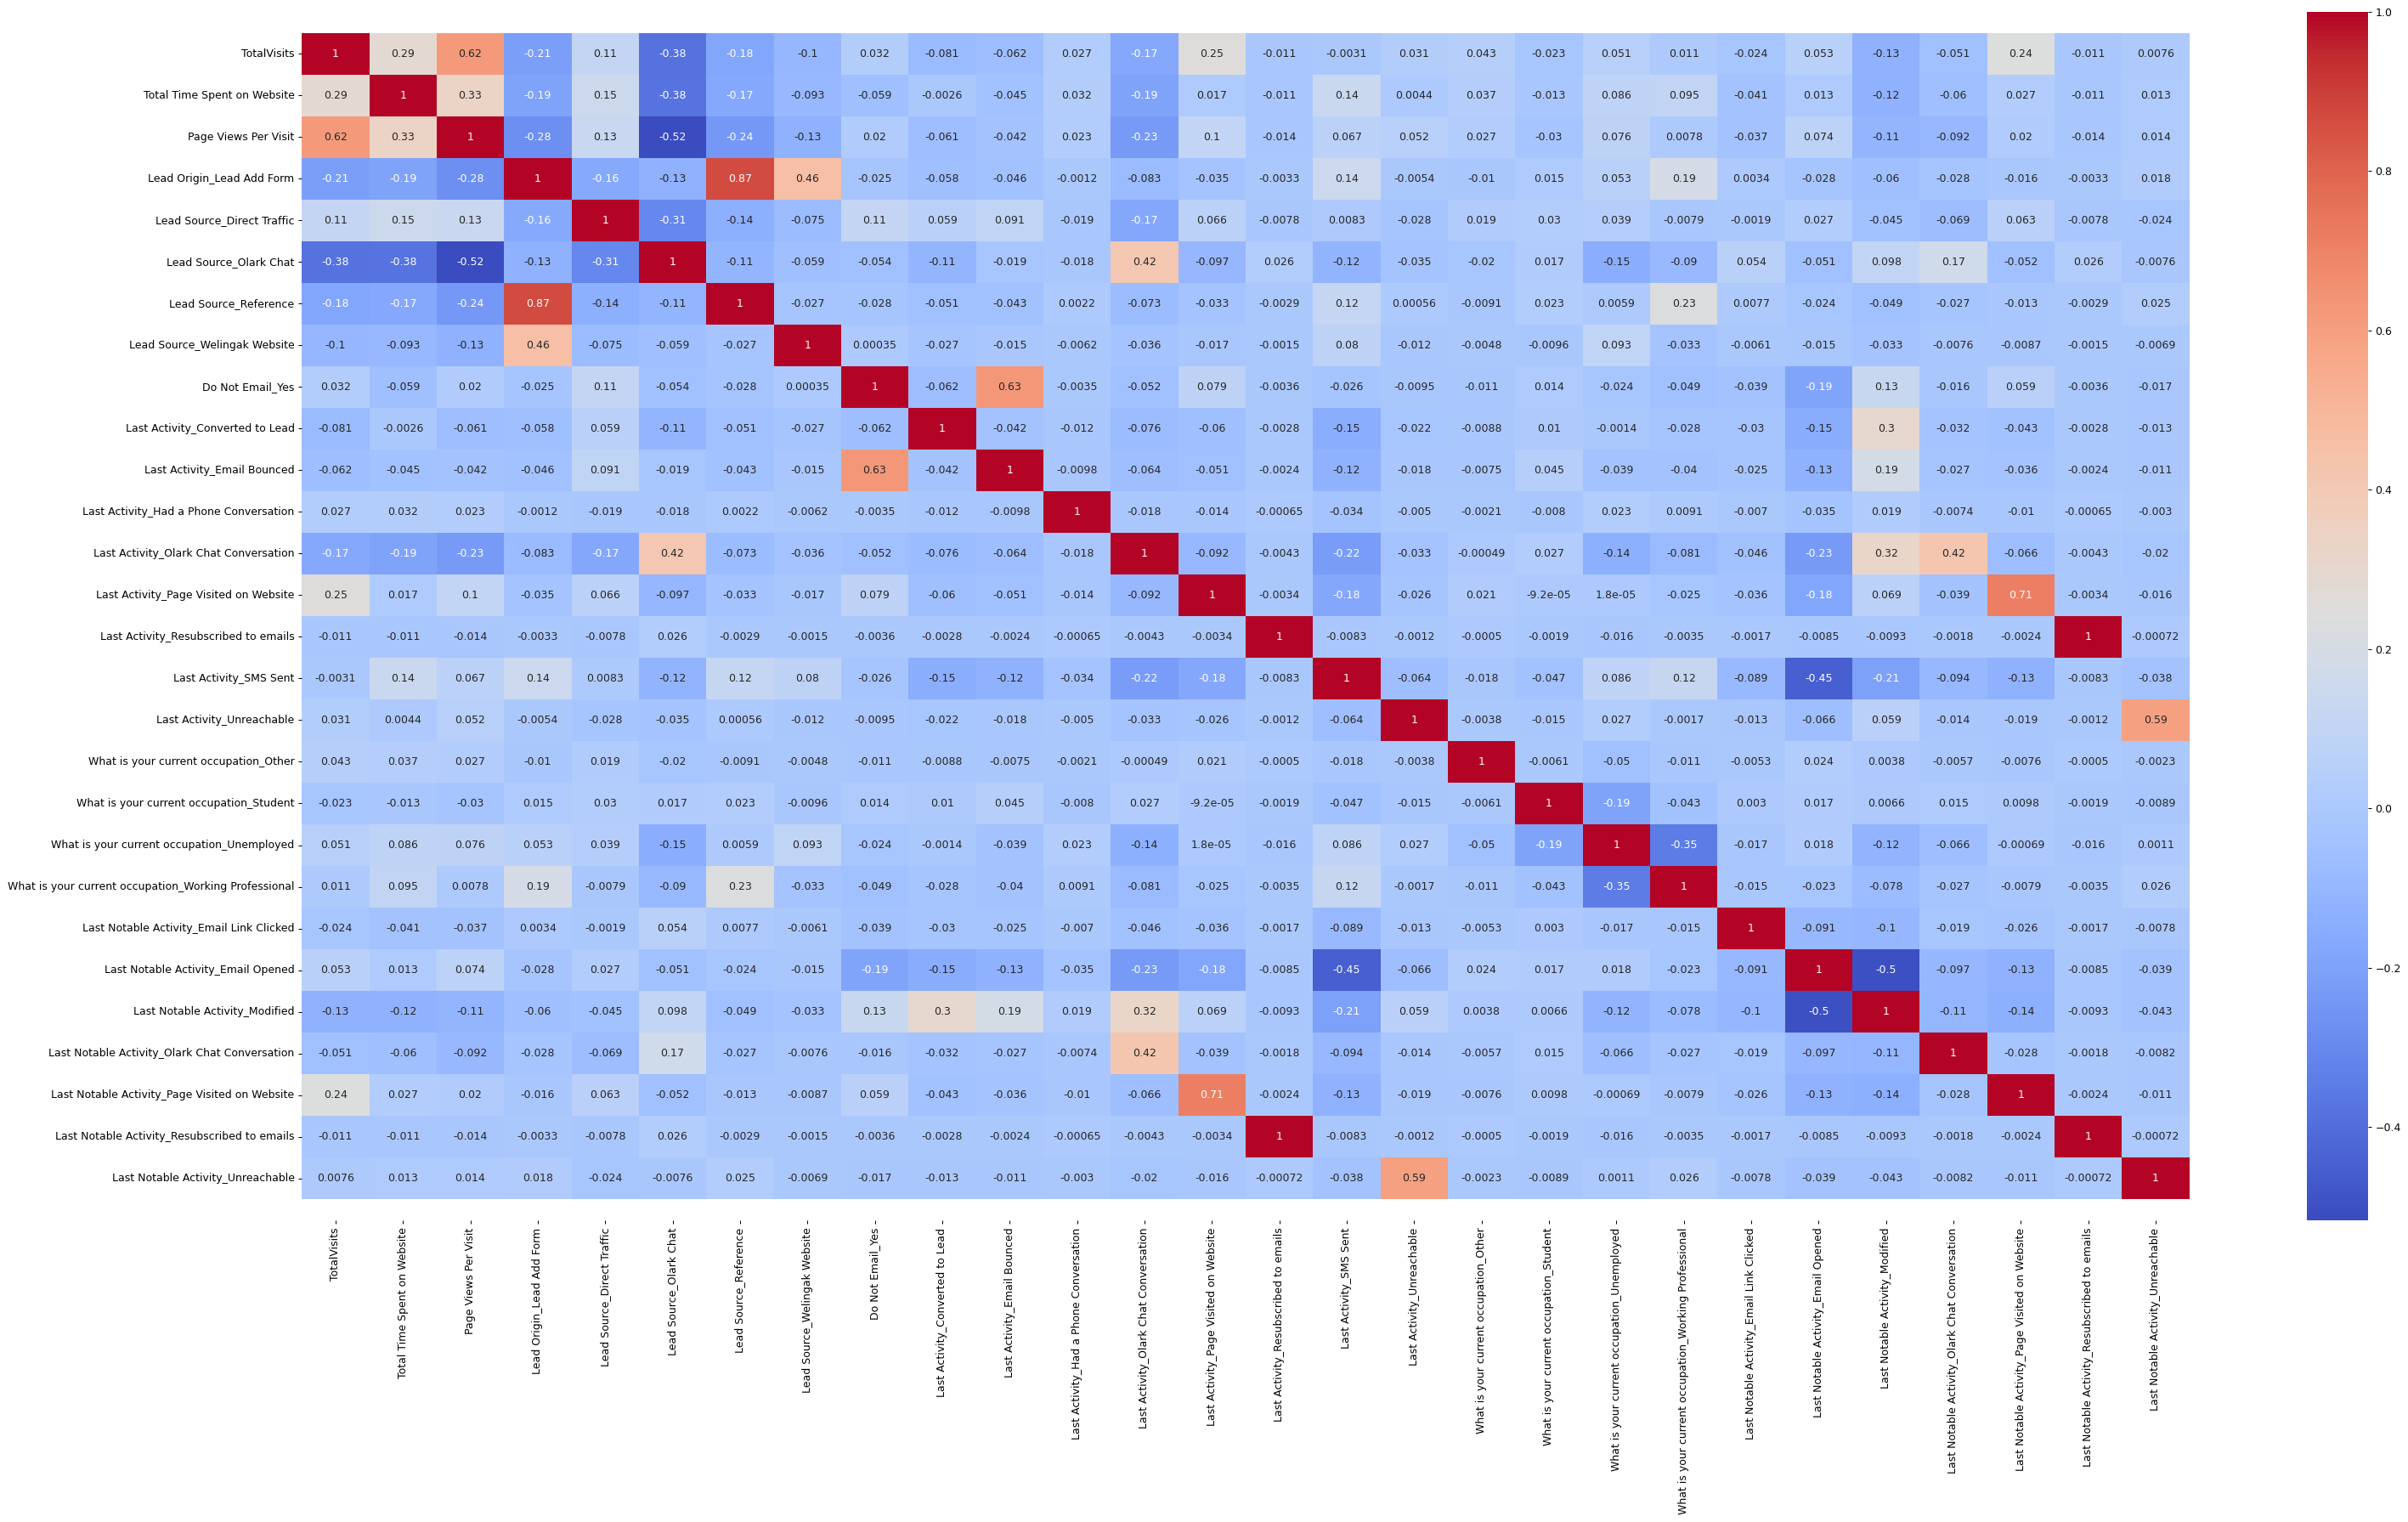

In [53]:
plt.figure(figsize=(35,20), dpi=90, facecolor='w', edgecolor='k', frameon='True')

corr = X_train_rfe[cols].corr()
ax = sns.heatmap(corr, annot=True, cmap="coolwarm")

bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.tight_layout()
plt.show()

The latest model is having the variables with low p-value and low VIF which means that there is very less multicollinearity among the features.

**Creating Predictions**

In [54]:
# Predicting probabilties on train set

y_train_pred = res3.predict(X_train_sm)
y_train_pred[:10]

1289    0.736142
3604    0.095081
5584    0.264445
7679    0.100065
7563    0.319283
7978    0.867486
7780    0.188363
7863    0.985941
838     0.652800
708     0.171510
dtype: float64

In [55]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.73614172, 0.09508098, 0.26444485, 0.10006526, 0.31928276,
       0.8674864 , 0.18836258, 0.98594104, 0.65279974, 0.17150971])

In [56]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Probability,LeadID
0,1,0.736142,1289
1,0,0.095081,3604
2,0,0.264445,5584
3,0,0.100065,7679
4,0,0.319283,7563


In [57]:
# Substituting 0 or 1 with cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final['Lead_Score']=y_train_pred_final['Conversion_Probability'].apply(lambda x:int(x*100))
y_train_pred_final.head()

,Converted,Conversion_Probability,LeadID,Predicted,Lead_Score
0,1,0.736142,1289,1,73
1,0,0.095081,3604,0,9
2,0,0.264445,5584,0,26
3,0,0.100065,7679,0,10
4,0,0.319283,7563,0,31


Making predictions on Train set

In [58]:
# Creating confusion matrix

confusionmatrix = metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final.Predicted)
confusionmatrix

array([[3442,  453],
       [ 723, 1733]], dtype=int64)

In [59]:
# Checking overall accuracy
metrics.accuracy_score(y_train_pred_final['Converted'],y_train_pred_final.Predicted)

0.814832309872461

In [60]:
TP = confusionmatrix[1,1]
TN = confusionmatrix[0,0]
FP = confusionmatrix[0,1]
FN = confusionmatrix[1,0]

In [61]:
# Calculating sensitivity
TP/(TP+FN)

0.7056188925081434

In [62]:
# Calculating specificity
TN/(TN+FP)

0.8836970474967908

**Finding Optimal Cutoff Point**

In [63]:
nums = [float(x)/10 for x in range(10)]
for i in nums:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,LeadID,Predicted,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.736142,1289,1,73,1,1,1,1,1,1,1,1,0,0
1,0,0.095081,3604,0,9,1,0,0,0,0,0,0,0,0,0
2,0,0.264445,5584,0,26,1,1,1,0,0,0,0,0,0,0
3,0,0.100065,7679,0,10,1,1,0,0,0,0,0,0,0,0
4,0,0.319283,7563,0,31,1,1,1,1,0,0,0,0,0,0


In [64]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total

    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.631554,0.969870,0.418228
0.2,0.2,0.768540,0.919381,0.673427
0.3,0.3,0.804598,0.867264,0.765083
0.4,0.4,0.815147,0.782980,0.835430
0.5,0.5,0.814832,0.705619,0.883697
0.6,0.6,0.809479,0.639658,0.916560
0.7,0.7,0.783184,0.522801,0.947368
0.8,0.8,0.755629,0.421824,0.966110
0.9,0.9,0.710754,0.272394,0.987163


<Figure size 1500x1000 with 0 Axes>

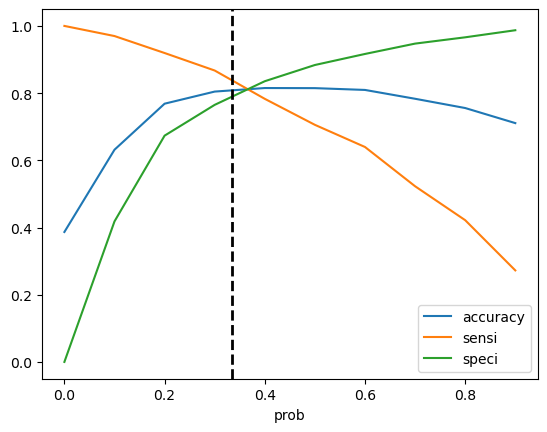

In [65]:
plt.figure(figsize = (15,10))
cutoff_df.plot.line(x='prob',y = ['accuracy','sensi','speci'])
plt.axvline(x=0.335,c='black',lw=2,linestyle='--')
plt.show()

In [66]:
# From the curve, we can see 0.35 is the optimum point to take it as cutoff probability

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,LeadID,Predicted,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.736142,1289,1,73,1,1,1,1,1,1,1,1,0,0,1
1,0,0.095081,3604,0,9,1,0,0,0,0,0,0,0,0,0,0
2,0,0.264445,5584,0,26,1,1,1,0,0,0,0,0,0,0,0
3,0,0.100065,7679,0,10,1,1,0,0,0,0,0,0,0,0,0
4,0,0.319283,7563,0,31,1,1,1,1,0,0,0,0,0,0,0


In [67]:
# Checking overall accuracy
metrics.accuracy_score(y_train_pred_final['Converted'],y_train_pred_final.Predicted)

0.814832309872461

In [68]:
# Creating confusion matrix

confusionmatrix = metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final.Predicted)
confusionmatrix

array([[3442,  453],
       [ 723, 1733]], dtype=int64)

In [69]:
TP = confusionmatrix[1,1]
TN = confusionmatrix[0,0]
FP = confusionmatrix[0,1]
FN = confusionmatrix[1,0]

In [70]:
# Calculating sensitivity
TP/(TP+FN)

0.7056188925081434

In [71]:
# Calculating specificity
TN/(TN+FP)

0.8836970474967908

**Precision-Recall**

In [72]:
# Calculating precision
TP/(TP+FP)

0.792772186642269

In [73]:
# Calculating recall
TP/(TP+FN)

0.7056188925081434

**Precision and Recall Tradeoff**

In [74]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

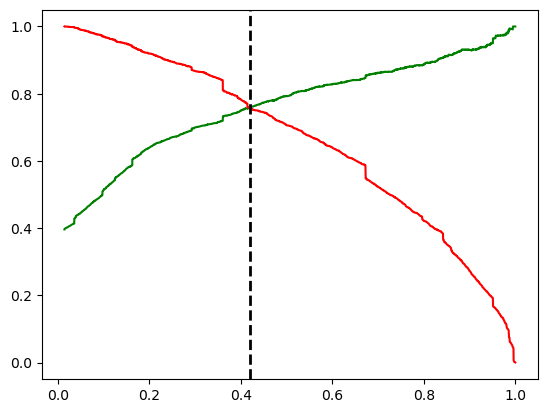

In [75]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.42, c='black', lw=2, linestyle='--')
plt.show()

From the above graph, we get optical threshold value as 0.42. Thus, we can consider any lead with conversion probability higher than 42% as hot lead.

In [76]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,LeadID,Predicted,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.736142,1289,1,73,1,1,1,1,1,1,1,1,0,0,1
1,0,0.095081,3604,0,9,1,0,0,0,0,0,0,0,0,0,0
2,0,0.264445,5584,0,26,1,1,1,0,0,0,0,0,0,0,0
3,0,0.100065,7679,0,10,1,1,0,0,0,0,0,0,0,0,0
4,0,0.319283,7563,0,31,1,1,1,1,0,0,0,0,0,0,0


In [77]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8131002991654858

In [78]:
# Creating confusion matrix

confusionmatrix = metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final.Predicted)
confusionmatrix

array([[3442,  453],
       [ 723, 1733]], dtype=int64)

In [79]:
TP = confusionmatrix[1,1]
TN = confusionmatrix[0,0]
FP = confusionmatrix[0,1]
FN = confusionmatrix[1,0]

In [80]:
# Calculating precision
TP/(TP+FP)

0.792772186642269

In [81]:
# Calculating recall
TP/(TP+FN)

0.7056188925081434

Making predictions on Test set

In [82]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [83]:
cols = X_train_rfe.columns

In [84]:
X_test = X_test[cols]
X_test_sm = sm.add_constant(X_test[cols])
X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_Unreachable
8308,1.0,0.035461,0.416813,0.208333,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
7212,1.0,0.028369,0.001320,0.166667,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2085,1.0,0.000000,0.000000,0.000000,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4048,1.0,0.028369,0.617077,0.083333,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4790,1.0,0.028369,0.005282,0.083333,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [85]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res3.predict(X_test_sm)
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_test_df['LeadID'] = y_test_df.index
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Probability'})
y_pred_final.head()

,Converted,LeadID,Conversion_Probability
0,0,8308,0.221849
1,1,7212,0.874850
2,1,2085,0.985941
3,1,4048,0.890855
4,0,4790,0.116473


In [86]:
# Making prediction using cut off 0.35

y_pred_final['final_predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final['Lead_Score'] = y_pred_final['Conversion_Probability'].apply(lambda x: int(x*100))
y_pred_final.head()

,Converted,LeadID,Conversion_Probability,final_predicted,Lead_Score
0,0,8308,0.221849,0,22
1,1,7212,0.874850,1,87
2,1,2085,0.985941,1,98
3,1,4048,0.890855,1,89
4,0,4790,0.116473,0,11


In [87]:
# Checking overall accuracy
metrics.accuracy_score(y_pred_final['Converted'],y_pred_final.final_predicted)

0.8094013955196474

In [88]:
# Creating confusion matrix

confusionmatrix1 = metrics.confusion_matrix(y_pred_final['Converted'],y_pred_final.final_predicted)
confusionmatrix1

array([[1372,  372],
       [ 147,  832]], dtype=int64)

In [89]:
TP = confusionmatrix1[1,1]
TN = confusionmatrix1[0,0]
FP = confusionmatrix1[0,1]
FN = confusionmatrix1[1,0]

In [90]:
# Calculating sensitivity
TP/(TP+FN)

0.849846782431052

In [91]:
# Calculating specificity
TN/(TN+FP)

0.786697247706422

In [92]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res3.predict(X_test_sm)
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_test_df['LeadID'] = y_test_df.index
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Probability'})
y_pred_final.head()

,Converted,LeadID,Conversion_Probability
0,0,8308,0.221849
1,1,7212,0.874850
2,1,2085,0.985941
3,1,4048,0.890855
4,0,4790,0.116473


In [93]:
# Making prediction using cut off 0.42

y_pred_final['final_predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final['Lead_Score'] = y_pred_final['Conversion_Probability'].apply(lambda x: int(x*100))
y_pred_final.head()

,Converted,LeadID,Conversion_Probability,final_predicted,Lead_Score
0,0,8308,0.221849,0,22
1,1,7212,0.874850,1,87
2,1,2085,0.985941,1,98
3,1,4048,0.890855,1,89
4,0,4790,0.116473,0,11


In [94]:
# Checking overall accuracy
metrics.accuracy_score(y_pred_final['Converted'],y_pred_final.final_predicted)

0.8226221079691517

In [95]:
# Creating confusion matrix

confusionmatrix1 = metrics.confusion_matrix(y_pred_final['Converted'],y_pred_final.final_predicted)
confusionmatrix1

array([[1493,  251],
       [ 232,  747]], dtype=int64)

In [96]:
TP = confusionmatrix1[1,1]
TN = confusionmatrix1[0,0]
FP = confusionmatrix1[0,1]
FN = confusionmatrix1[1,0]

In [97]:
# Calculating precision
TP/(TP+FP)

0.748496993987976

In [98]:
# Calculating recall
TP/(TP+FN)

0.763023493360572

**Calculating Lead Score**

In [99]:
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,Converted,LeadID,Conversion_Probability,final_predicted,Lead_Score
0,0,8308,0.221849,0,22
1,1,7212,0.874850,1,87
2,1,2085,0.985941,1,98
3,1,4048,0.890855,1,89
4,0,4790,0.116473,0,11


In [100]:
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Conversion_Probability,LeadID,Predicted,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.736142,1289,1,73,1,1,1,1,1,1,1,1,0,0,1
1,0,0.095081,3604,0,9,1,0,0,0,0,0,0,0,0,0,0
2,0,0.264445,5584,0,26,1,1,1,0,0,0,0,0,0,0,0
3,0,0.100065,7679,0,10,1,1,0,0,0,0,0,0,0,0,0
4,0,0.319283,7563,0,31,1,1,1,1,0,0,0,0,0,0,0


In [101]:
# Dropping unnecessary columns from train dataset

leads_train_pred = leads_train_pred[['LeadID','Converted','Conversion_Probability','final_predicted']]
leads_train_pred.head()

,LeadID,Converted,Conversion_Probability,final_predicted
0,1289,1,0.736142,1
1,3604,0,0.095081,0
2,5584,0,0.264445,0
3,7679,0,0.100065,0
4,7563,0,0.319283,0


In [102]:
# Concatenating train and test dataframes along with rows

lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,LeadID,Converted,Conversion_Probability,final_predicted,Lead_Score
0,1289,1,0.736142,1,NaN
1,3604,0,0.095081,0,NaN
2,5584,0,0.264445,0,NaN
3,7679,0,0.100065,0,NaN
4,7563,0,0.319283,0,NaN


In [103]:
# Lead Score = 100 * Conversion_Prob

lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Probability'].apply(lambda x: round(x*100))
lead_full_pred.head()

,LeadID,Converted,Conversion_Probability,final_predicted,Lead_Score
0,1289,1,0.736142,1,74
1,3604,0,0.095081,0,10
2,5584,0,0.264445,0,26
3,7679,0,0.100065,0,10
4,7563,0,0.319283,0,32


In [104]:
lead_full_pred = lead_full_pred.set_index('LeadID').sort_index(axis=0,ascending=True)
lead_full_pred.head()

,Converted,Conversion_Probability,final_predicted,Lead_Score
LeadID,,,,
0,0,0.190369,0,19
1,0,0.422565,1,42
2,1,0.751855,1,75
3,0,0.063021,0,6
4,1,0.542724,1,54


In [105]:
leadscore = lead_score_copy['Lead Number']
leadscore.head()

0    660737
1    660728
2    660727
3    660719
4    660681
Name: Lead Number, dtype: int64

In [106]:
# Concatenating the dataframes based on index so that Lead Score is associated with the Lead Number of each lead.

leads_with_score = pd.concat([leadscore,lead_full_pred],axis=1)
leads_with_score.head(10)

,Lead Number,Converted,Conversion_Probability,final_predicted,Lead_Score
0,660737,0.0,0.190369,0.0,19.0
1,660728,0.0,0.422565,1.0,42.0
2,660727,1.0,0.751855,1.0,75.0
3,660719,0.0,0.063021,0.0,6.0
4,660681,1.0,0.542724,1.0,54.0
5,660680,0.0,0.035828,0.0,4.0
6,660673,1.0,0.772298,1.0,77.0
7,660664,0.0,0.035828,0.0,4.0
8,660624,0.0,0.043511,0.0,4.0
9,660616,0.0,0.054540,0.0,5.0


**Feature Importance**

In [107]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res3.params[1:]
new_params

TotalVisits                                             8.41
Total Time Spent on Website                             4.63
Page Views Per Visit                                   -2.56
Lead Origin_Lead Add Form                               1.36
Lead Source_Direct Traffic                             -0.36
Lead Source_Olark Chat                                  1.14
Lead Source_Reference                                   2.03
Lead Source_Welingak Website                            4.61
Do Not Email_Yes                                       -1.28
Last Activity_Converted to Lead                        -0.72
Last Activity_Email Bounced                            -1.00
Last Activity_Had a Phone Conversation                  1.45
Last Activity_Olark Chat Conversation                  -1.34
Last Activity_Page Visited on Website                  -0.56
Last Activity_Resubscribed to emails                   10.68
Last Activity_SMS Sent                                  0.45
Last Activity_Unreachabl

In [108]:
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

TotalVisits                                             78.71
Total Time Spent on Website                             43.37
Page Views Per Visit                                   -23.97
Lead Origin_Lead Add Form                               12.74
Lead Source_Direct Traffic                              -3.35
Lead Source_Olark Chat                                  10.72
Lead Source_Reference                                   19.01
Lead Source_Welingak Website                            43.15
Do Not Email_Yes                                       -12.00
Last Activity_Converted to Lead                         -6.78
Last Activity_Email Bounced                             -9.39
Last Activity_Had a Phone Conversation                  13.54
Last Activity_Olark Chat Conversation                  -12.59
Last Activity_Page Visited on Website                   -5.28
Last Activity_Resubscribed to emails                   100.00
Last Activity_SMS Sent                                   4.19
Last Act

In [109]:
sorted_indx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_indx

TotalVisits                                              2
Total Time Spent on Website                             21
Page Views Per Visit                                    12
Lead Origin_Lead Add Form                                8
Lead Source_Direct Traffic                              23
Lead Source_Olark Chat                                  24
Lead Source_Reference                                   10
Lead Source_Welingak Website                            25
Do Not Email_Yes                                        16
Last Activity_Converted to Lead                         22
Last Activity_Email Bounced                              9
Last Activity_Had a Phone Conversation                  13
Last Activity_Olark Chat Conversation                    4
Last Activity_Page Visited on Website                   15
Last Activity_Resubscribed to emails                    19
Last Activity_SMS Sent                                   5
Last Activity_Unreachable                               

**Plot showing feature variables based on their relative coefficient values**

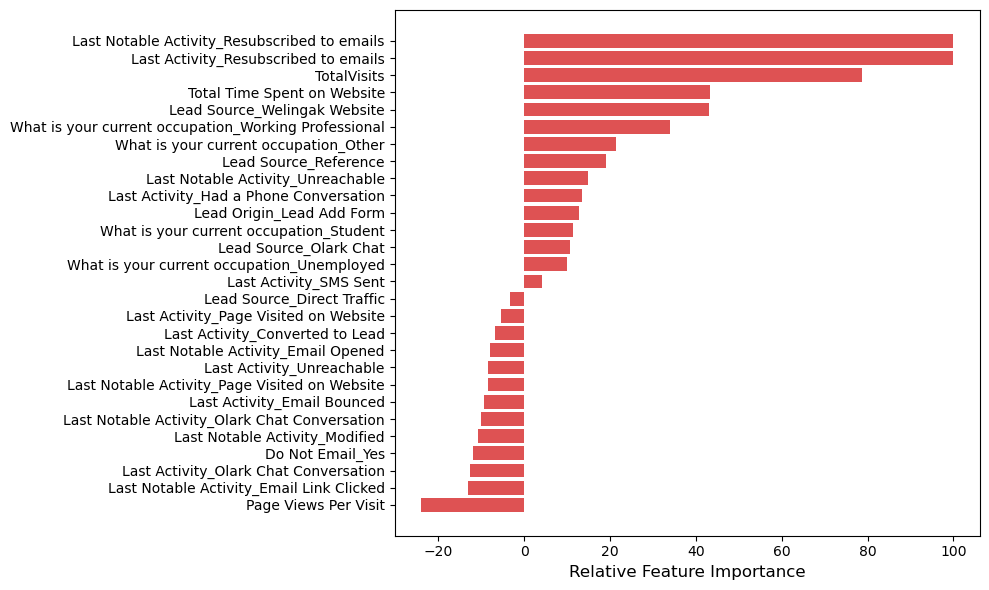

In [110]:
pos = np.arange(sorted_indx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_indx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train_rfe[cols].columns)[sorted_indx], fontsize=10)
featax.set_xlabel('Relative Feature Importance', fontsize=12)

plt.tight_layout()
plt.show()

In [111]:
# Top three variables which contribute most towards the probability of a lead getting converted

pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
26,Last Notable Activity_Resubscribed to emails,100.00
14,Last Activity_Resubscribed to emails,100.00
0,TotalVisits,78.71
